# Part A: Data Cleaning 

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [164]:
df = pd.read_csv('bottle.csv')

C:\Users\Gokturk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [165]:
df.shape

(864863, 74)

In [166]:
df1=df[['T_degC', 'Salnty', 'STheta','O2ml_L', 'Depthm'] ]

In [167]:
df1.head()

,T_degC,Salnty,STheta,O2ml_L,Depthm
0,10.50,33.440,25.649,NaN,0
1,10.46,33.440,25.656,NaN,8
2,10.46,33.437,25.654,NaN,10
3,10.45,33.420,25.643,NaN,19
4,10.45,33.421,25.643,NaN,20


In [168]:
df2 = df1.dropna()

In [169]:
df2.shape

(661268, 5)

In [170]:
#filtering outliers, 
df2.STheta[df2.STheta>30]

Series([], Name: STheta, dtype: float64)

Text(0,0.5,'T_degC')

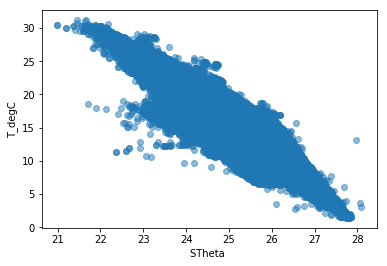

In [171]:
plt.scatter(df2.STheta,df2.T_degC, alpha =0.5)
plt.xlabel('STheta ')
plt.ylabel('T_degC')

#No outliers seen

# Part B: Train & Test Split and Scaling

In [172]:
X = df2.drop('T_degC', axis =1).as_matrix()
y = df2[['T_degC']].as_matrix()

C:\Users\Gokturk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Gokturk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [173]:
print(X.shape), print(y.shape)

(661268, 4)
(661268, 1)


(None, None)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 123 )

In [175]:
scaling_tool = StandardScaler()


In [176]:
X_train_scaled = scaling_tool.fit_transform(X_train)
X_test_scaled = scaling_tool.transform(X_test)


# Part C: Linear Regression with sklearn

In [177]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [178]:
print("Intercept: ", lin_reg.intercept_)
print("Coefficients: ", lin_reg.coef_)

Intercept:  [10.9179667]
Coefficients:  [[ 1.63043225 -4.63280759  0.30147163 -0.47464559]]


In [179]:
y_pred_sklearn = lin_reg.predict(X_test_scaled)
y_pred_sklearn

array([[21.05219343],
       [ 8.93574178],
       [16.64404203],
       ...,
       [ 8.46213933],
       [ 3.86698107],
       [ 2.02032658]])

In [180]:
#mean squared error
print("MSE :", metrics.mean_squared_error(y_test,y_pred_sklearn))

#r-squared
print("R-squared  :",metrics.r2_score(y_test,y_pred_sklearn))

#explained variance
print("Explained Variance  :", metrics.explained_variance_score(y_test,y_pred_sklearn))

MSE : 0.11162986873073971
R-squared  : 0.9937471006319525
Explained Variance  : 0.9937471249077593


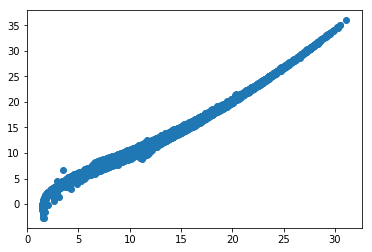

In [181]:
plt.scatter(y_test, y_pred_sklearn) 
plt.show()

# Part D: Gradient Descent Mini-Batch

In [182]:
X_b = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
X_new_b  = np.c_[np.ones((len(X_test), 1)), X_test_scaled]

In [183]:
# mini-batch size  50 

n_iterations = 100
minibatch_size = 50
np.random.seed(42)
eta=0.1
m=len(y_train)
theta = np.random.randn(5,1)  # random initialization

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients

In [184]:
# predict
y_pred = X_new_b.dot(theta)

In [185]:
# Performance of prediction on test data

#mean squared error
print("MSE :", metrics.mean_squared_error(y_test,y_pred))

#r-squared
print("R-squared  :",metrics.r2_score(y_test,y_pred))

#explained variance
print("Explained Variance  :", metrics.explained_variance_score(y_test,y_pred))


MSE : 0.11301000352520174
R-squared  : 0.9936697929715366
Explained Variance  : 0.9936865906197633


In [186]:
# Performance of prediction on train data

#mean squared error 
print("MSE :", metrics.mean_squared_error(y_train,y_pred_train))

#r-squared 
print("R-squared  :",metrics.r2_score(y_train,y_pred_train))

#explained variance 
print("Explained Variance  :", metrics.explained_variance_score(y_train,y_pred_train))

MSE : 0.11070988206178442
R-squared  : 0.9937960778150767
Explained Variance  : 0.993796136593822


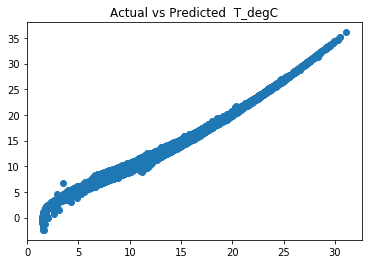

In [187]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted  T_degC")
plt.show()

In [188]:
# mini-batch size 250

n_iterations = 100
minibatch_size = 250
np.random.seed(42)
eta=0.1
m=len(y_train)
theta = np.random.randn(5,1)  # random initialization

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients


In [189]:
# predict
y_pred = X_new_b.dot(theta)

In [190]:
# Performance of prediction on test data

#mean squared error
print("MSE :", metrics.mean_squared_error(y_test,y_pred))

#r-squared
print("R-squared  :",metrics.r2_score(y_test,y_pred))

#explained variance
print("Explained Variance  :", metrics.explained_variance_score(y_test,y_pred))

MSE : 0.11281027988792036
R-squared  : 0.9936809804056843
Explained Variance  : 0.9936833636781942


In [191]:
# Performance of prediction on train data

#mean squared error 
print("MSE :", metrics.mean_squared_error(y_train,y_pred_train))

#r-squared 
print("R-squared  :",metrics.r2_score(y_train,y_pred_train))

#explained variance 
print("Explained Variance  :", metrics.explained_variance_score(y_train,y_pred_train))

MSE : 0.11070988206178442
R-squared  : 0.9937960778150767
Explained Variance  : 0.993796136593822


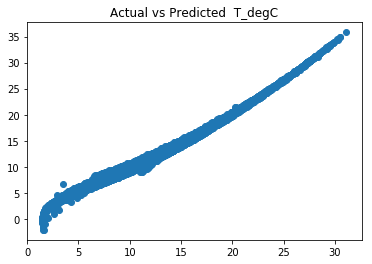

In [192]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted  T_degC")
plt.show()

In [193]:
# mini-batch size 2000

n_iterations = 100
minibatch_size = 2000
np.random.seed(42)
eta=0.1
m=len(y_train)
theta = np.random.randn(5,1)  # random initialization

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients



In [194]:
# predict on test
y_pred = X_new_b.dot(theta)

In [195]:
# predict on train
y_pred_train = X_b.dot(theta)

In [196]:
# Performance of prediction on test data

#mean squared error test
print("MSE :", metrics.mean_squared_error(y_test,y_pred))

#r-squared test
print("R-squared  :",metrics.r2_score(y_test,y_pred))

#explained variance test
print("Explained Variance  :", metrics.explained_variance_score(y_test,y_pred))

MSE : 0.11195810469182528
R-squared  : 0.9937287146349342
Explained Variance  : 0.9937288764428088


In [197]:
# Performance of prediction on train data

#mean squared error train
print("MSE :", metrics.mean_squared_error(y_train,y_pred_train))

#r-squared train
print("R-squared  :",metrics.r2_score(y_train,y_pred_train))

#explained variance train
print("Explained Variance  :", metrics.explained_variance_score(y_train,y_pred_train))

MSE : 0.11070988206178442
R-squared  : 0.9937960778150767
Explained Variance  : 0.993796136593822


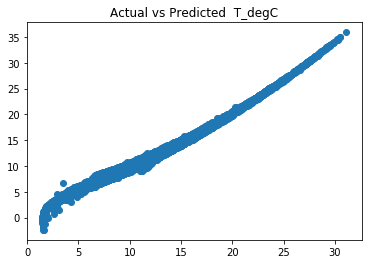

In [198]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted  T_degC")
plt.show()

# Part E: Conceptual Questions

1) Describe how parameter estimation in Gradient Descent differs from using the normal equation.

Both of them tries to minimize the cost function.

Gradient Descent takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point to find a local minimum of a function .

Gradient Descent first initialize the weights(coefficients) in the function with random values and calculate Error (SSE).It then calculates the gradient/change in SSE when the weights(coefficients) are changed by a very small value from their original randomly initialized value. This moves the values of coefficients in the direction in which SSE is minimized. It then adjusts the weights with the gradients to reach the optimal values where SSE is minimized. After this, new weights are used to predict and calculate the new SSE. These steps are repeated till further adjustments to weights doesn’t significantly reduce the error.

As seen, Gradient Descent is an iterative process whereas normal equation is an analytical process. 


2) We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?

Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance.

Instead of computing the gradients based on just one instance as in Stochastic GD, Mini-batch GD computes the gradients on small random sets of instances called minibatches.


3) Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.

My best-performing version of Gradient Descent was the one with the mini-batch size = 2000 with lowest MSE. The difference in the error metrics between the test data vs training data are minimum and the values look similar so this version doesn't show signs of overfitting .


4) Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?

Learning rate is the size of the steps the gradient descent algorithm takes to reach the local minimum.
It might be helpful to change it, as , with a high learning rate the algorithm can cover more ground in each step, but there is a risk of overshooting the lowest point since the slope of the function is constantly changing. Or, with a very low learning rate, the algorithm can confidently move in the direction of the negative gradient since the algorithm is recalculating it so frequently. A low learning rate is more precise, but this time calculating the gradient will be time-consuming, so it will take a very long time to get to the bottom of the cost function.


5) Why would a data scientist want to use early stopping in gradient descent? 

To make sure the model doesn't overfit. This improves the performance of a model up to a point when the model is predicting on a data it hasn't seen before.